<b><h1> Analysis for FreeRadius (vAAA)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import matplotlib
import numpy as np
#sns.set(font_scale=1.3, style="ticks")

In [67]:
def select_and_rename(df, mapping):
    """
    Helper: Selects columns of df using the keys
    of the mapping dict.
    It renames the columns to the values of the
    mappings dict.
    """
    # select subset of columns
    dff = df[list(mapping.keys())]
    # rename 
    for k, v in mapping.items():
        #print("Renaming: {} -> {}".format(k, v))
        dff.rename(columns={k: v}, inplace=True)
    #print(dff.head())
    return dff

<b>Read result File

In [68]:
#df = pd.read_csv("/home/arif/gitRepos/ah-tng-bench-experiments/results-archive/vaaa_results_20191126_second_run/result_ec_metrics.csv")
df = pd.read_csv("/home/arif/gitRepos/ah-tng-bench-experiments/results-archive/20191202_run_local_lab/result_ec_metrics.csv")

In [69]:
#df

In [70]:
#df.columns.tolist()

In [71]:
vaaa_map_01 = {
    "param__func__mp.input__cmd_start": "req_size",
    "param__func__de.upb.vAAA.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.vAAA.0.1__mem_max": "memory",
    "param__func__mp.input__cpu_bw": "probe_cpu_bw",
    "metric__vnf0.vdu01.0__FreeRADIUS-Total-Auth-Responses": "Radius-Auth-Response",
    "metric__mp.input.vdu01.0__FreeRADIUS-Total-Auth-Responses": "Probe-Radius-Auth-Response",
    #"param__func__mp.input__mem_max": "probe_memory",
    #"metric__mp.input.vdu01.0__ab_total_transfer_byte": "transf_bytes",
    #"metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "req_transf_rate",
    "metric__vnf0.vdu01.0__stat__input__rx_bytes": "if_rx_bytes",
    #"metric__vnf0.vdu01.0__stat__input__rx_dropped": "if_in_rx_dropped",
    #"metric__vnf0.vdu01.0__stat__input__rx_errors": "if_in_rx_errors",
    #"metric__vnf0.vdu01.0__stat__input__rx_packets": "if_in_rx_packets",
    "metric__vnf0.vdu01.0__stat__input__tx_bytes": "if_tx_bytes",
    #"metric__vnf0.vdu01.0__stat__input__tx_dropped": "if_in_tx_dropped",
    #"metric__vnf0.vdu01.0__stat__input__tx_errors": "if_in_tx_errors",
    #"metric__vnf0.vdu01.0__stat__input__tx_packets": "if_in_tx_packets",
}


In [72]:
def cleanup(df):
    """
    Cleanup of df data.
    Dataset specific.
    """
    def _replace(df, column, str1, str2):
        if column in df:
            df[column] = df[column].str.replace(str1, str2)
            
    def _to_num(df, column):
        if column in df:
            df[column] = pd.to_numeric(df[column])
        
    #_replace(df, "req_size", "ab -c 1 -t 60 -n 9999 -e /tngbench_share/ab_logs.csv -s 60 -k -i http://20.0.0.254:80/", "-")


In [73]:
df["vnf"] = "vaaa"

dfs_raw = [df]
map_list = [vaaa_map_01]
dfs = list()  # clean data frames

for (df, m) in zip(dfs_raw, map_list):
    tmp = select_and_rename(df.copy(), m)
    #cleanup(tmp)
    dfs.append(tmp)

dfs[0].head()


,req_size,cpu_bw,memory,probe_cpu_bw,Radius-Auth-Response,Probe-Radius-Auth-Response,if_rx_bytes,if_tx_bytes
0,./start.sh,0.1,256,0.5,49369,45527,4274661.0,3093988.0
1,./start.sh,0.1,512,0.5,64394,60382,5567737.0,4029816.0
2,./start.sh,0.1,1024,0.5,90122,87170,7766145.0,5620902.0
3,./start.sh,0.1,2024,0.5,86715,84511,7518446.0,5441618.0
4,./start.sh,0.2,256,0.5,99975,95529,8608049.0,6230196.0


In [74]:
df01 = select_and_rename(df, vaaa_map_01)


In [75]:
df01.head()

,req_size,cpu_bw,memory,probe_cpu_bw,Radius-Auth-Response,Probe-Radius-Auth-Response,if_rx_bytes,if_tx_bytes
0,./start.sh,0.1,256,0.5,49369,45527,4274661.0,3093988.0
1,./start.sh,0.1,512,0.5,64394,60382,5567737.0,4029816.0
2,./start.sh,0.1,1024,0.5,90122,87170,7766145.0,5620902.0
3,./start.sh,0.1,2024,0.5,86715,84511,7518446.0,5441618.0
4,./start.sh,0.2,256,0.5,99975,95529,8608049.0,6230196.0


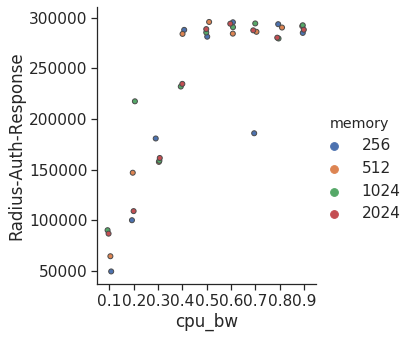

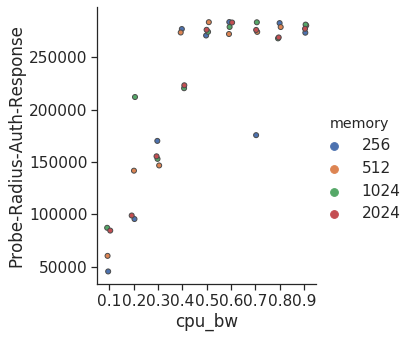

In [82]:
metrics =  ["Radius-Auth-Response", "Probe-Radius-Auth-Response"]
hue_col = "memory"
x_col = "cpu_bw"

#dff = df01.loc[df01["memory"] == 1024]
#dff = dff.loc[dff["ruleset"] == "big"]
#dff = dff.loc[dff[x_col] >= .5]

for m in metrics:
    sns.catplot(x=x_col, y=m, hue=hue_col, data=df01, kind="strip", height=5, aspect=1, linewidth=1)

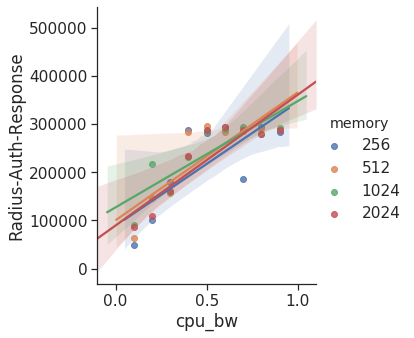

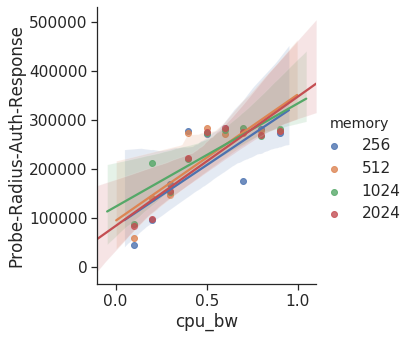

In [81]:
metrics =  ["Radius-Auth-Response", "Probe-Radius-Auth-Response"]
hue_col = "memory"
x_col = "cpu_bw"

#dff = df01.loc[df01["memory"] == 1024]
#dff = dff.loc[dff["ruleset"] == "big"]
#dff = dff.loc[dff[x_col] >= .5]

for m in metrics:
    sns.lmplot(x=x_col, y=m, hue=hue_col, data=df01)